In [ ]:

import pandas as pd
import numpy as np

df = pd.read_csv('/dataset (3).csv')
missing_data = df.isnull().sum()
print("Missing data in the dataset:\n", missing_data)
df_clean = df.dropna()
incorrect_data = df_clean[(df_clean['body_mass_g'] < 0) | (df_clean['flipper_length_mm'] < 0)]
print("Incorrect data:\n", incorrect_data)
df_clean = df_clean[df_clean['body_mass_g'] >= 0]
print("Cleaned dataset info:\n", df_clean.info())


Missing data in the dataset:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
Incorrect data:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            323 non-null    object 
 1   island             323 non-null    object 
 2   bill_length_mm     323 non-null    float64
 3   bill_depth_mm      323 non-null    float64
 4   flipper_length_mm  323 non-null    float64
 5   body_mass_g        323 non-null    float64
 6   sex                323 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.2+ KB
Cleaned dataset info:
 None


To clean the dataset, we first look for missing data using isnull().sum() to see how many missing values are in each column. If the dataset contains missing values, we can handle it by either removing rows with missing data using dropna() or filling the missing values using techniques like mean, median, or mode.Incorrect data such as negative body mass or bill measurements can be identified and removed or corrected.

In [ ]:

average_body_mass_g = df_clean[df_clean['species'] == 'Gentoo']['body_mass_g'].mean()
print("Average body_mass_g for Gentoo penguins:", average_body_mass_g)


Average body_mass_g for Gentoo penguins: 5159.151785714285



For species: Adelie
Bill Length (mm) - Skewness: 0.15, Kurtosis: -0.15
Bill Depth (mm) - Skewness: 0.30, Kurtosis: -0.09

For species: Gentoo
Bill Length (mm) - Skewness: 0.64, Kurtosis: 1.16
Bill Depth (mm) - Skewness: 0.32, Kurtosis: -0.59

For species: Chinstrap
Bill Length (mm) - Skewness: -0.09, Kurtosis: -0.03
Bill Depth (mm) - Skewness: 0.00, Kurtosis: -0.90


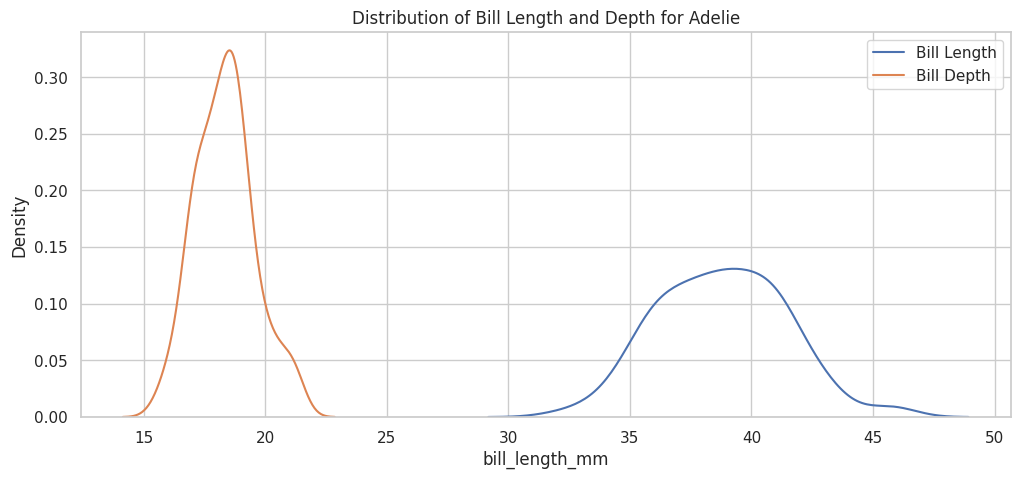

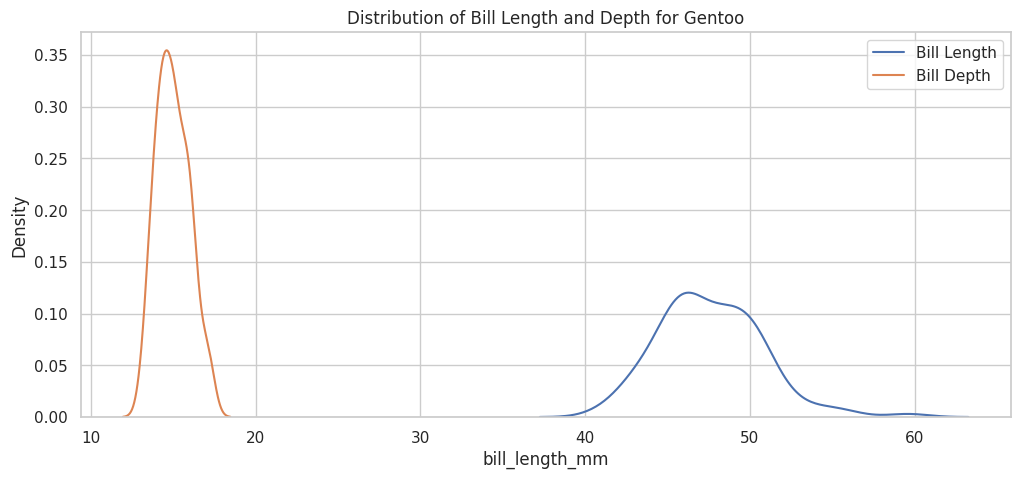

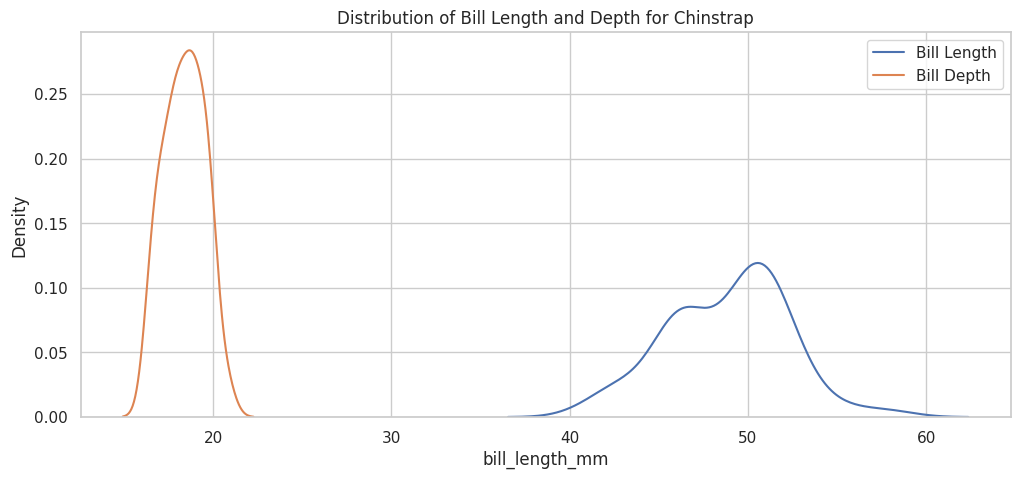

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

species = df_clean['species'].unique()
for s in species:
    bill_length = df_clean[df_clean['species'] == s]['bill_length_mm']
    skewness_length = skew(bill_length)
    kurtosis_length = kurtosis(bill_length)

    bill_depth = df_clean[df_clean['species'] == s]['bill_depth_mm']
    skewness_depth = skew(bill_depth)
    kurtosis_depth = kurtosis(bill_depth)

    print(f"\nFor species: {s}")
    print(f"Bill Length (mm) - Skewness: {skewness_length:.2f}, Kurtosis: {kurtosis_length:.2f}")
    print(f"Bill Depth (mm) - Skewness: {skewness_depth:.2f}, Kurtosis: {kurtosis_depth:.2f}")

sns.set(style="whitegrid")
for s in species:
    plt.figure(figsize=(12, 5))
    sns.kdeplot(df_clean[df_clean['species'] == s]['bill_length_mm'], label='Bill Length')
    sns.kdeplot(df_clean[df_clean['species'] == s]['bill_depth_mm'], label='Bill Depth')
    plt.title(f"Distribution of Bill Length and Depth for {s}")
    plt.legend()
    plt.show()


analyzing skewness (asymmetry) and kurtosis (tailedness) for bill_length_mm and bill_depth_mm across species. Positive skewness suggests a longer right tail, and negative skewness indicates a longer left tail. Kurtosis measures the tail density; high kurtosis indicates outliers, while low suggests flatness. Visualizing these distributions helps understand how they vary among penguin species.

Outliers in dataset:
 bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          3
dtype: int64


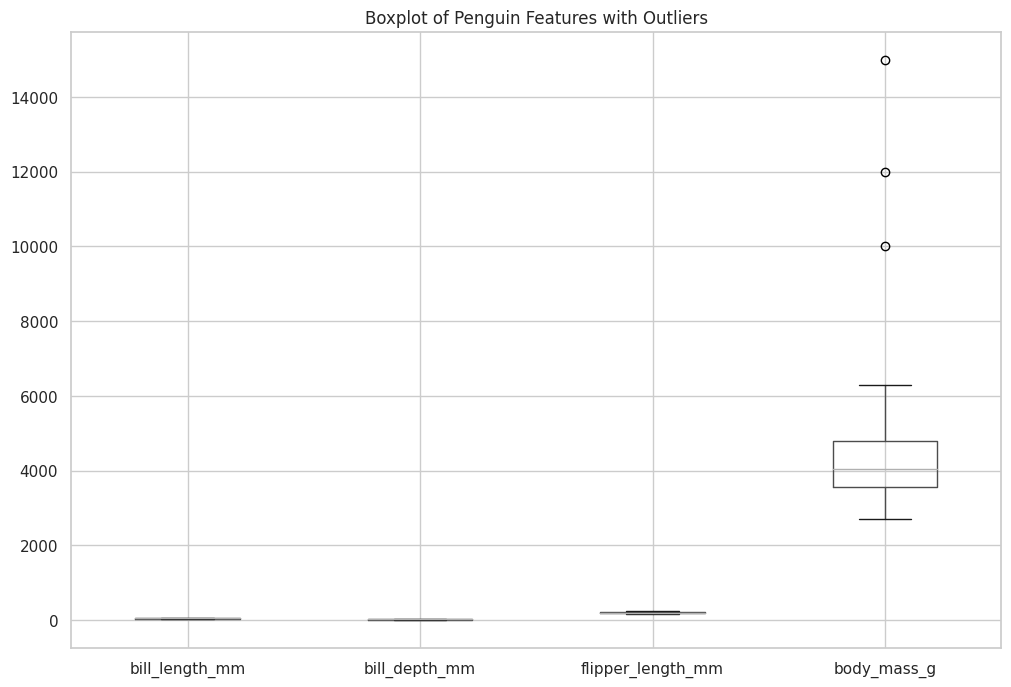

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
outliers = df_clean[numerical_columns].apply(detect_outliers_iqr)
print("Outliers in dataset:\n", outliers.sum())
plt.figure(figsize=(12, 8))
df_clean[numerical_columns].boxplot()
plt.title("Boxplot of Penguin Features with Outliers")
plt.show()


Outliers are detected using the Interquartile Range (IQR) method. Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers. We apply this method to numerical features like bill_length_mm and visualize them using boxplots, which highlight data points that fall outside the expected range.

Explained variance by components: [0.61557234 0.19748104]


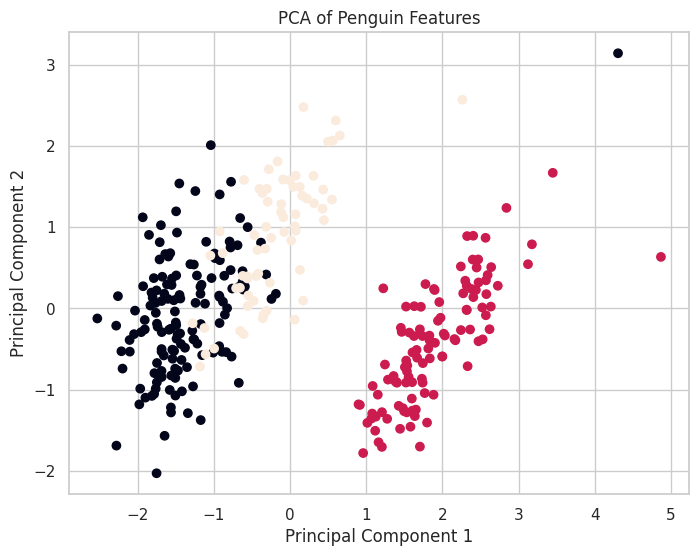

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df_clean[numerical_columns]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)
print("Explained variance by components:", pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df_clean['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}))
plt.title('PCA of Penguin Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The curse of dimensionality refers to challenges in analyzing datasets with many features. PCA helps by reducing the dataset's dimensions while retaining most of the variance. We perform PCA to reduce the features to 2 or 3 components, making the data easier to visualize and analyze while mitigating the effects of high-dimensionality.

<ipython-input-9-829dae77ff96>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 6)


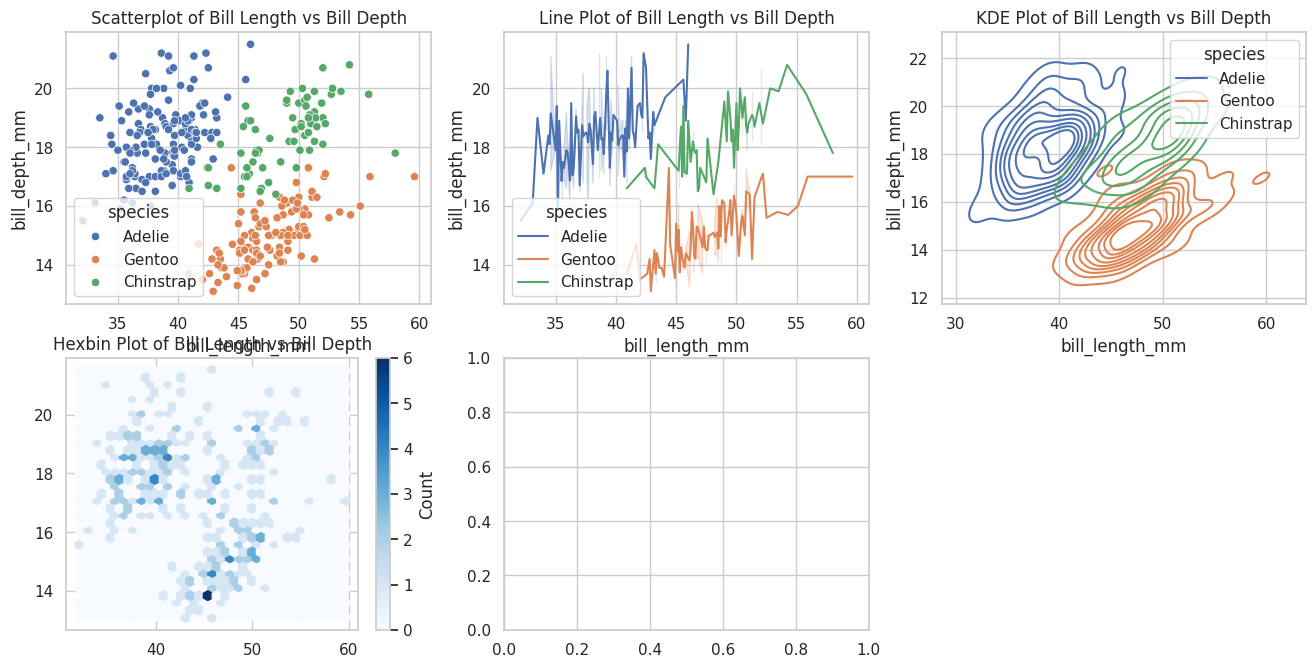

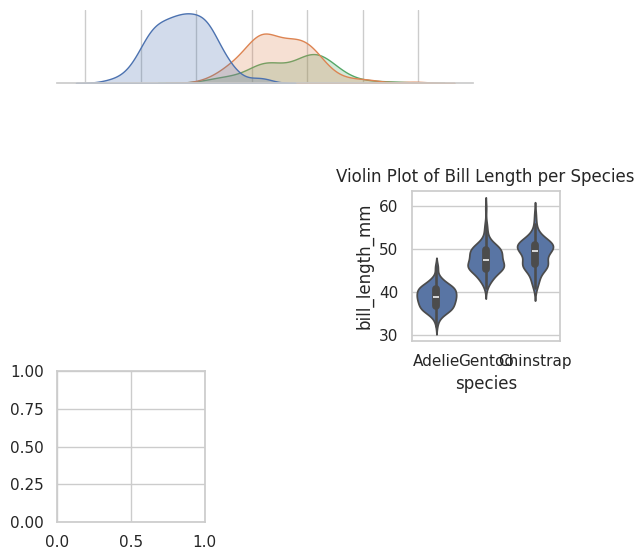

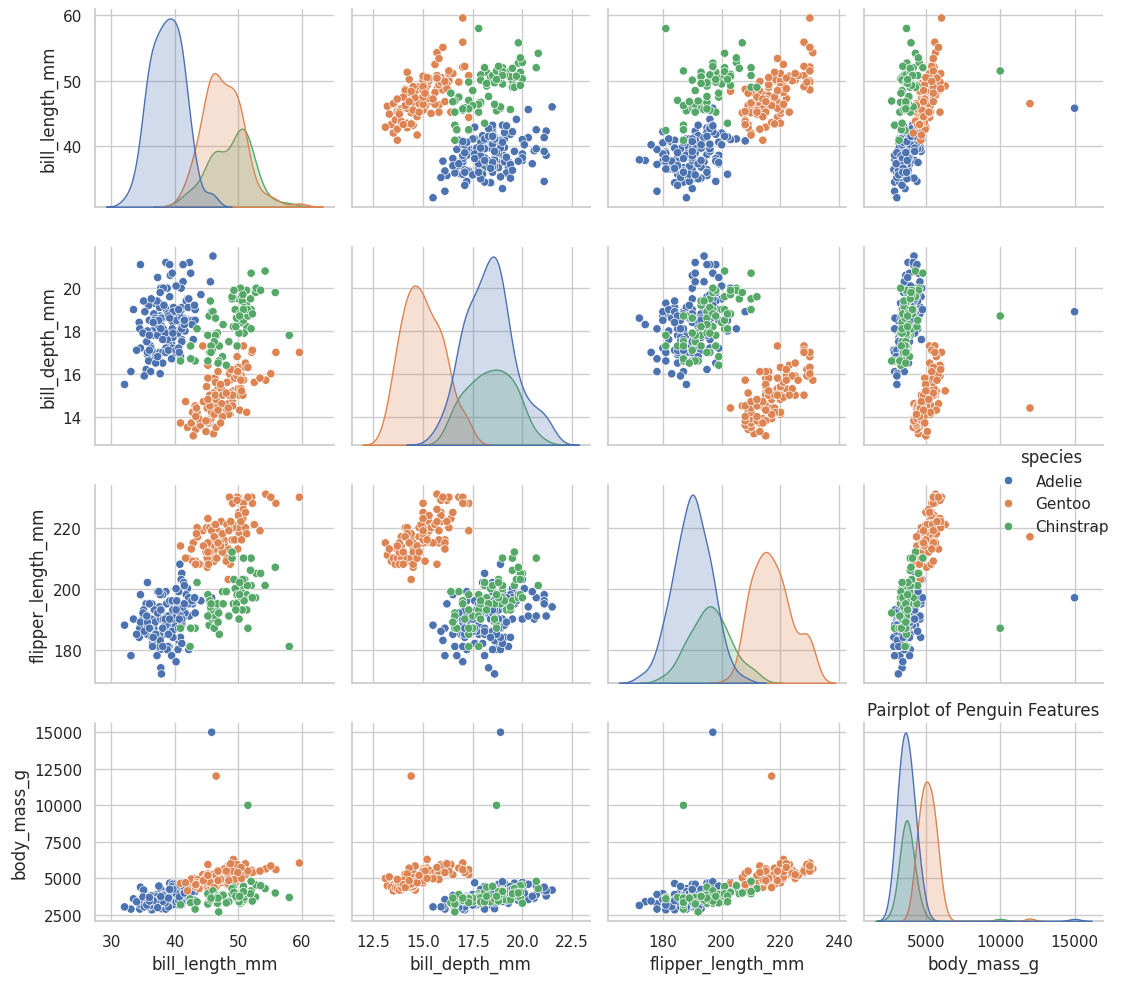

In [ ]:

plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 1)
sns.scatterplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatterplot of Bill Length vs Bill Depth')
plt.subplot(3, 3, 2)
sns.lineplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Line Plot of Bill Length vs Bill Depth')
plt.subplot(3, 3, 3)
sns.kdeplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('KDE Plot of Bill Length vs Bill Depth')
plt.subplot(3, 3, 4)
plt.hexbin(df_clean['bill_length_mm'], df_clean['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Bill Length vs Bill Depth')
plt.subplot(3, 3, 5)
sns.jointplot(data=df_clean, x='bill_length_mm', y='bill_depth_mm', hue='species', kind="scatter")
plt.title('Jointplot of Bill Length vs Bill Depth')
plt.subplot(3, 3, 6)
sns.violinplot(x='species', y='bill_length_mm', data=df_clean)
plt.title('Violin Plot of Bill Length per Species')
plt.subplot(3, 3, 7)
sns.pairplot(df_clean, hue='species')
plt.title('Pairplot of Penguin Features')
plt.tight_layout()
plt.show()


In [ ]:

max_flipper_length = df_clean.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("Maximum flipper length for each species and island combination:\n", max_flipper_length)


Maximum flipper length for each species and island combination:
      species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              202.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


In [ ]:
from scipy.stats import zscore
df_normalized = df_clean.copy()
df_normalized[numerical_columns] = df_clean[numerical_columns].apply(zscore)
print("Z-score normalized data:\n", df_normalized.head())


Z-score normalized data:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.873115       0.768343          -1.415643   
1  Adelie  Torgersen       -0.800309       0.104774          -1.056111   
2  Adelie  Torgersen       -0.654696       0.411037          -0.408954   
4  Adelie  Torgersen       -1.309955       1.074606          -0.552767   
5  Adelie  Torgersen       -0.836712       1.738175          -0.768486   

   body_mass_g     sex  
0    -0.459514    male  
1    -0.415366  female  
2    -0.900986  female  
4    -0.724397  female  
5    -0.547808    male  
